b'Loading bricks\ninitialize memory pool 15000  208  272\nx,y,t,p,vx_perp,vy_perp\ndone..\nprocess_batch 0, 5000\nSaving data result/bricks/flo_0_00000.bin, 0_0000\nSaving data result/bricks/flo_1_00000.bin, 1_0000\nprocess_batch 5000, 10000\nSaving data result/bricks/flo_0_00001.bin, 0_0001\nSaving data result/bricks/flo_1_00001.bin, 1_0001\nprocess_batch 10000, 15000\nSaving data result/bricks/flo_0_00002.bin, 0_0002\nSaving data result/bricks/flo_1_00002.bin, 1_0002\nWork took 0.080567 seconds for 15 K events (num_thread: 64)'
0
0


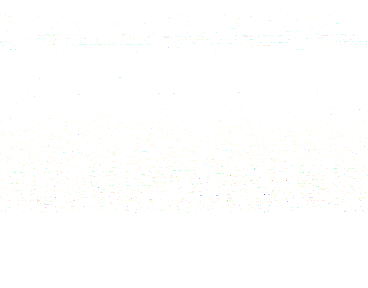

100


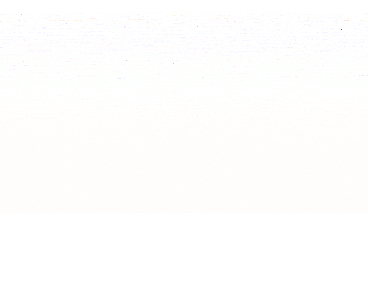

200


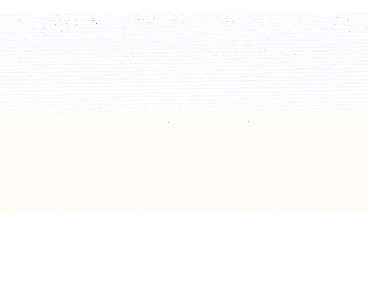

300


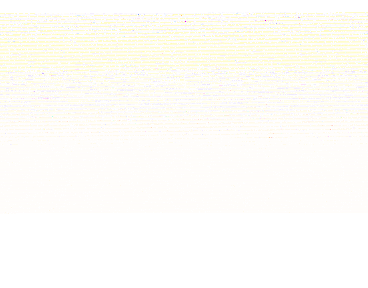

400


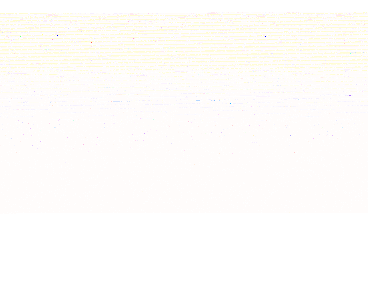

500


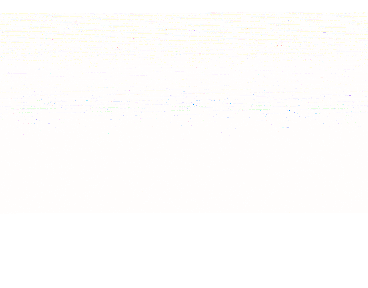

(288, 368, 2)


In [1]:
import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

WINSIZE = 5000

# dataset = "dummy"
# dataset = "bricks"
# dataset = "bricks_1slide"
dataset = "indoor_flying2"

bin_path = 'result/{}/flo_{:1d}_{:05d}.bin'
png_path = 'result/{}/flo_{:1d}_{:05d}.png'

if dataset=="indoor_flying2":
    B, W, H, C = 2921002, 368,288, 2
else:
    B, W, H, C = 15000, 272,208, 2

run_cpp= True
# n_itr = 10
n_itr   = B//WINSIZE
n_itr_show = 100

if run_cpp:
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

for index in [0]:
    for itr in range(n_itr):
        if itr%n_itr_show==0:
            print(itr)
            bin_path_ = bin_path.format(dataset, index, itr)
            png_path_ = png_path.format(dataset, index, itr)
            flo = np.fromfile(bin_path_, dtype=np.float64).reshape([H,W,C])
            flow_vis.save_flo(flo, png_path_)
            display(Image(filename=png_path_)) 

print(flo.shape)

